# CaseCraft Analytics Sprint Wrap-Up – Module 2/5  
## Reusable Logic Block Library

**Objective:**  
Curate and organize reusable logic blocks from the CaseCraft Sprint. These include segmentation, clustering, forecasting, and visualization templates—modularized for rapid reuse across future projects.

**Components:**  
- Synthetic dataset with mixed numeric and categorical features  
- Segmentation logic (rule-based and dynamic)  
- Clustering pipelines (scaling + model)  
- Forecasting templates (time series)  
- Visual formatting blocks (heatmaps, barplots, strip plots)

### Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Dataset

In [2]:
np.random.seed(42)

n = 200
segments = ['Retail', 'Finance', 'Influencer', 'NLP', 'Forecasting']
df = pd.DataFrame({
    'user_id': range(1, n+1),
    'segment': np.random.choice(segments, n),
    'activity_score': np.random.normal(60, 15, n).round(2),
    'conversion_rate': np.random.uniform(0.05, 0.25, n).round(3),
    'engagement_level': np.random.randint(1, 10, n),
    'monthly_visits': np.random.poisson(5, n),
    'timestamp': pd.date_range(start='2025-01-01', periods=n, freq='D')
})

In [16]:
df.head(10)

,user_id,segment,activity_score,conversion_rate,engagement_level,monthly_visits,timestamp,segment_flag,cluster
0,1,NLP,59.32,0.149,8,6,2025-01-01,General,0
1,2,Forecasting,63.25,0.067,1,3,2025-01-02,General,1
2,3,Influencer,67.69,0.068,4,5,2025-01-03,General,1
3,4,Forecasting,68.15,0.170,1,4,2025-01-04,General,3
4,5,Forecasting,60.42,0.161,8,4,2025-01-05,High Value,3
5,6,Finance,42.04,0.093,1,4,2025-01-06,General,1
6,7,Influencer,71.85,0.239,3,5,2025-01-07,General,2
7,8,Influencer,66.47,0.206,4,6,2025-01-08,General,2
8,9,Influencer,43.55,0.073,8,4,2025-01-09,General,1
9,10,Forecasting,49.77,0.236,6,2,2025-01-10,General,3


### Rule-Based Segmentation

Create audience segments using simple thresholds on engagement and conversion metrics. Useful for quick filtering and targeting logic.

In [5]:
df['segment_flag'] = np.where(
    (df['engagement_level'] >= 7) & (df['conversion_rate'] > 0.15),
    'High Value', 'General'
)

### Clustering Pipeline

Apply KMeans clustering on scaled numeric features to discover latent audience groups. Modular and reusable across datasets.

In [15]:
features = ['activity_score', 'conversion_rate', 'monthly_visits']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

model = KMeans(n_clusters=4, random_state=42)
df['cluster'] = model.fit_predict(X_scaled)

### Forecasting Template

Use Holt-Winters exponential smoothing to forecast time-based metrics. Adaptable for sales, visits, or engagement series.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


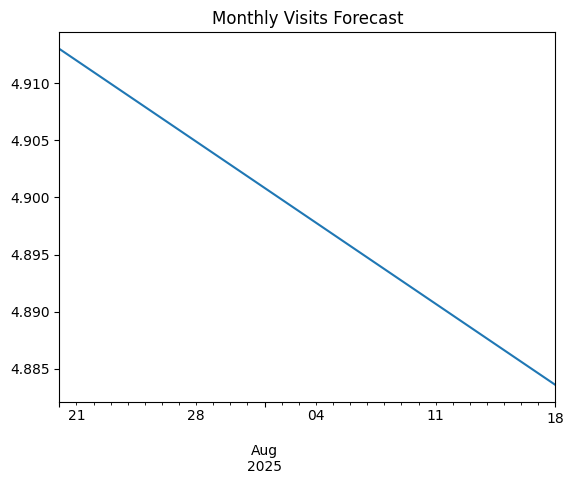

In [14]:
ts = df.set_index('timestamp')['monthly_visits']
model = ExponentialSmoothing(ts, trend='add', seasonal=None)
fit = model.fit()
forecast = fit.forecast(30)
forecast.plot(title='Monthly Visits Forecast')
plt.show()

### Heatmap Generator

Visualize correlation between numeric features using a heatmap. Useful for feature selection and exploratory analysis.

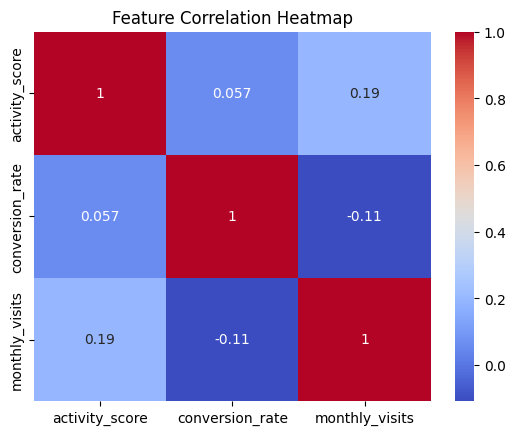

In [9]:
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Segment-Wise Barplot

Compare average activity scores across declared segments using a barplot. Useful for validating rule-based logic.

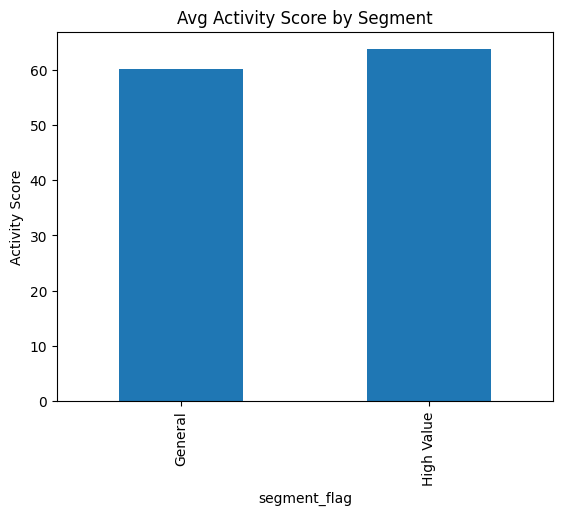

In [10]:
df.groupby('segment_flag')['activity_score'].mean().plot(kind='bar', title='Avg Activity Score by Segment')
plt.ylabel('Activity Score')
plt.show()

### Cluster Strip Plot

Visualize distribution of conversion rates across clusters using a strip plot. Helps assess cluster separation.

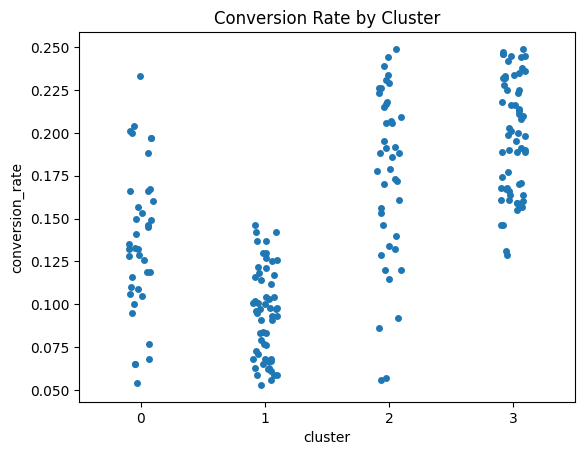

In [11]:
sns.stripplot(data=df, x='cluster', y='conversion_rate', jitter=True)
plt.title('Conversion Rate by Cluster')
plt.show()

### Engagement Histogram

Display distribution of engagement levels across all users. Useful for threshold tuning in segmentation logic.

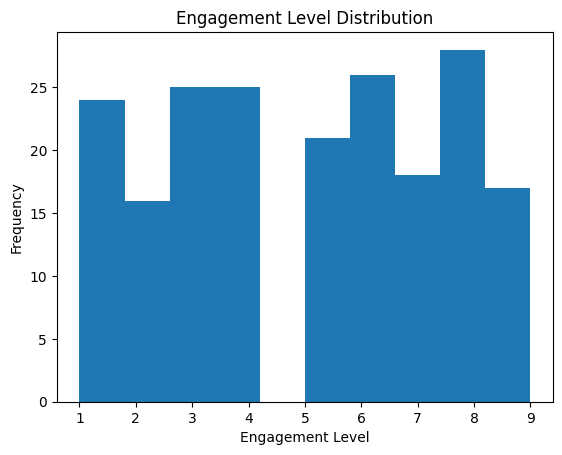

In [12]:
df['engagement_level'].plot(kind='hist', bins=10, title='Engagement Level Distribution')
plt.xlabel('Engagement Level')
plt.show()

### Visits Trend Line

Plot daily visits over time to observe seasonality or spikes. Useful for time series prep and anomaly detection.

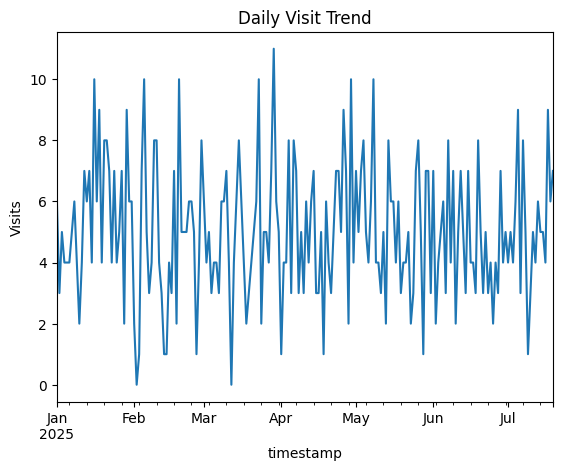

In [13]:
df.groupby('timestamp')['monthly_visits'].sum().plot(kind='line', title='Daily Visit Trend')
plt.ylabel('Visits')
plt.show()

### Summary Analysis

- **Segmentation Logic:** Rule-based flags and clustering pipelines offer complementary ways to group users.
- **Forecasting Utility:** Holt-Winters model provides smooth, interpretable projections for time-based metrics.
- **Visual Blocks:** Heatmaps, strip plots, and histograms offer quick diagnostics for feature behavior and segment separation.
- **Modularity:** Each block is reusable across datasets with minimal tuning—ideal for challenge prep, dashboards, and classroom demos.

### Final Conclusion

This module transforms raw logic into reusable building blocks for analytics workflows. Whether segmenting users, forecasting metrics, or visualizing patterns, each function is designed for clarity, reproducibility, and rapid deployment. The library supports future sprints, teaching kits, and portfolio packaging with minimal friction.